In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm




In [48]:
names = ('Season','Size','Speed','max_pH','min_O2','mean_Cl', 'mean_NO3', 'mean_NH4', 'mean_oPO4','mean_PO4', 'mean_Chlor', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7')

df = pd.read_table('Analysis.txt' ,sep='\s+', names=names , na_values='XXXXXXX')

df.Season = pd.Categorical(df.Season, categories=['spring', 'summer', 'autumn', 'winter'], ordered=True)
df.Size = pd.Categorical(df.Size, categories=['small', 'medium', 'large'], ordered=True)
df.Speed = pd.Categorical(df.Speed, categories=['low', 'medium', 'high'], ordered=True)

## Check how many NA a specific row contains
## df.isna().sum(axis=1).value_counts()

## remove any rows that contain more than 6 NA
df = df.loc[df.isna().sum(axis=1)<6].copy()


## df.isna().sum(axis=1).value_counts()

## Check which rows contain rest of NA
df.loc[df.isna().sum(axis=1) > 0]

## We can see from the table that mean_Cl and mean_Chlor contain a substantial amount of NA and max_pH , min_02 and mean_P04 have one NA value each , we will adress these NA values in the next cells


,Season,Size,Speed,max_pH,min_O2,mean_Cl,mean_NO3,mean_NH4,mean_oPO4,mean_PO4,mean_Chlor,a1,a2,a3,a4,a5,a6,a7
27,autumn,small,high,6.80,11.1,9.000,0.630,20.0,4.000,NaN,2.70,30.3,1.9,0.0,0.0,2.1,1.4,2.1
37,spring,small,high,8.00,NaN,1.450,0.810,10.0,2.500,3.000,0.30,75.8,0.0,0.0,0.0,0.0,0.0,0.0
47,winter,small,low,NaN,12.6,9.000,0.230,10.0,5.000,6.000,1.10,35.5,0.0,0.0,0.0,0.0,0.0,0.0
54,winter,small,high,6.60,10.8,NaN,3.245,10.0,1.000,6.500,NaN,24.3,0.0,0.0,0.0,0.0,0.0,0.0
55,spring,small,medium,5.60,11.8,NaN,2.220,5.0,1.000,1.000,NaN,82.7,0.0,0.0,0.0,0.0,0.0,0.0
56,autumn,small,medium,5.70,10.8,NaN,2.550,10.0,1.000,4.000,NaN,16.8,4.6,3.9,11.5,0.0,0.0,0.0
57,spring,small,high,6.60,9.5,NaN,1.320,20.0,1.000,6.000,NaN,46.8,0.0,0.0,28.8,0.0,0.0,0.0
58,summer,small,high,6.60,10.8,NaN,2.640,10.0,2.000,11.000,NaN,46.9,0.0,0.0,13.4,0.0,0.0,0.0
59,autumn,small,medium,6.60,11.3,NaN,4.170,10.0,1.000,6.000,NaN,47.1,0.0,0.0,0.0,0.0,1.2,0.0
60,spring,small,medium,6.50,10.4,NaN,5.970,10.0,2.000,14.000,NaN,66.9,0.0,0.0,0.0,0.0,0.0,0.0


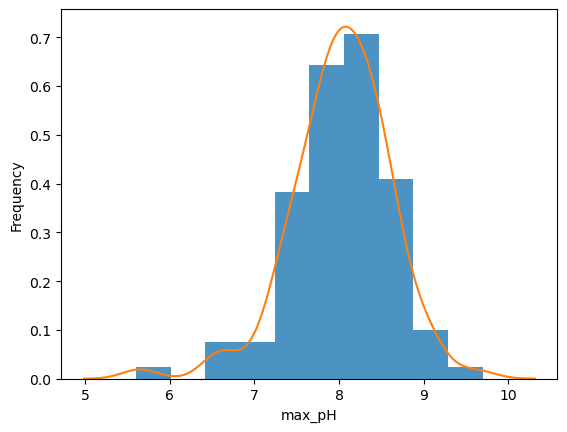

/home/PStefans/.conda/envs/pandas_workshop/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


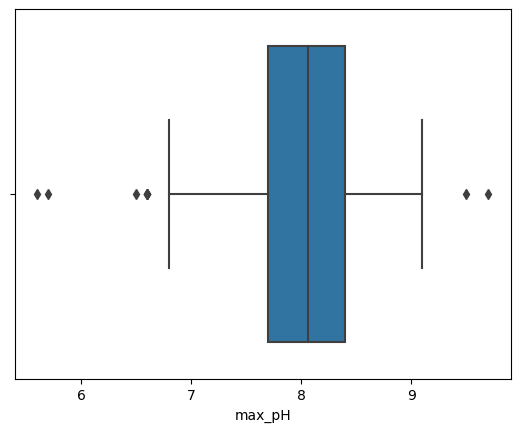

In [49]:
## max_pH


##fig = sm.qqplot(df['max_pH'], line='45') 

df['max_pH'].plot(kind='hist', legend=False, density=True, alpha=0.8)
##df['max_pH'].plot(kind='kde', legend=False, color='blue')
sns.kdeplot(df.max_pH)
plt.show()


## kde (Kernel Density Estimation) estimates the pdf (probability density function) and from the plot below we can deduct the realtive likelihood of a random number being close to the sample
## the highest likelihood looks to be around 8  

sns.boxplot(df.max_pH)
plt.show()

## From the boxplot we can see that the median vaue is roughly 8 aswell and a a few outliers are present on each side 
## In this case it would be appropriate to replace any missing value with the mean or median 

## Replacing missing pH values with the mean pH
df.max_pH.fillna(df.max_pH.mean(), inplace=True)


##plt.hist(df['max_pH'])
##plt.kde(df['max_pH'])


/home/PStefans/.conda/envs/pandas_workshop/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


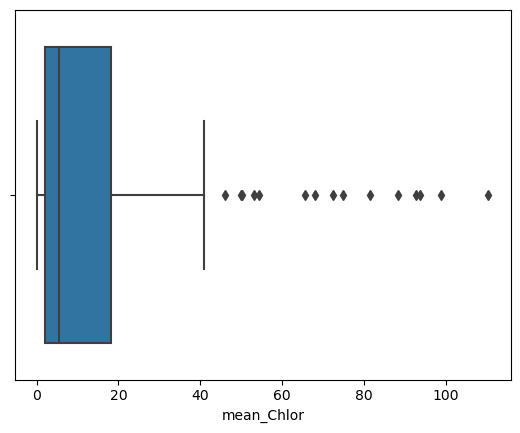

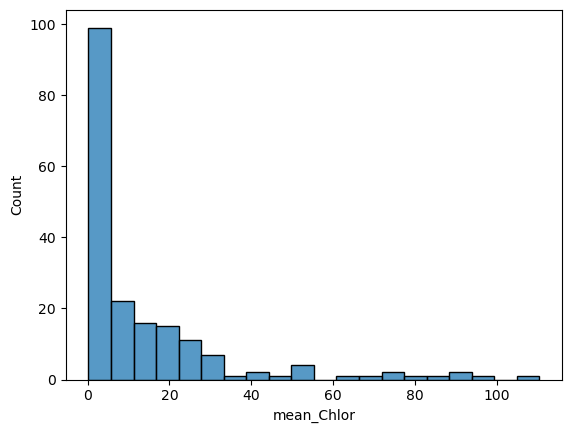

In [50]:
##mean_Chlor
sns.boxplot(df.mean_Chlor)
plt.show()
sns.histplot(df.mean_Chlor)
plt.show()
## data on both plots is clustered around the left side showing an uneven distribution so the mean would not be a good representative of the central location
## we will use the median to replace all NA values

df.mean_Chlor.fillna(df.mean_Chlor.median(), inplace=True)

/home/PStefans/.conda/envs/pandas_workshop/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


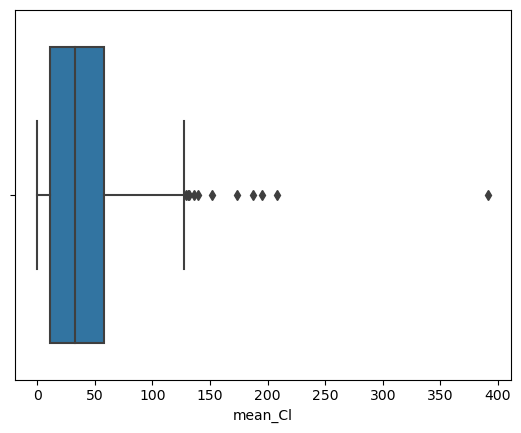

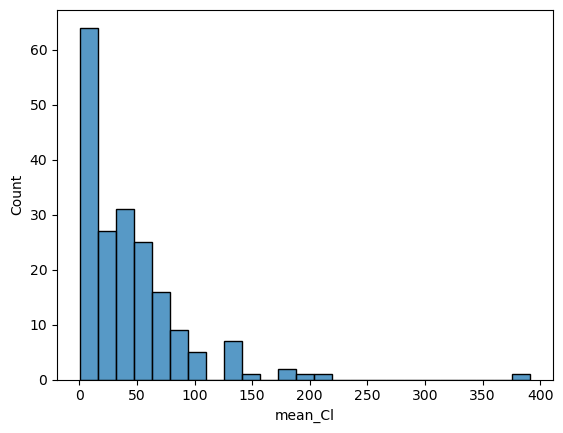

In [51]:
##mean_Cl
sns.boxplot(df.mean_Cl)
plt.show()
sns.histplot(df.mean_Cl)
plt.show()

## Similarly to mean_Chlor the values are clustere around the leftr side showing an uneven distributuon , 
## so in this case using the median would also be a better representation of the central location to replace NA values.

df.mean_Cl.fillna(df.mean_Cl.median(), inplace=True)


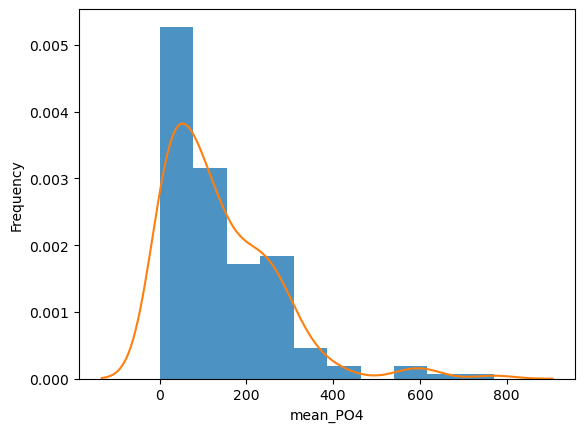

/home/PStefans/.conda/envs/pandas_workshop/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


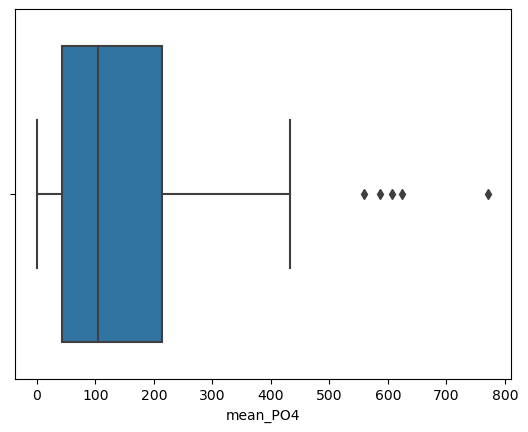

,Season,Size,Speed,max_pH,min_O2,mean_Cl,mean_NO3,mean_NH4,mean_oPO4,mean_PO4,mean_Chlor,a1,a2,a3,a4,a5,a6,a7
37,spring,small,high,8.0,NaN,1.45,0.81,10.0,2.5,3.0,0.3,75.8,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
##mean_P04
df['mean_PO4'].plot(kind='hist', legend=False, density=True, alpha=0.8)
sns.kdeplot(df.mean_PO4)
plt.show()

sns.boxplot(df.mean_PO4)
plt.show()

## yet again values seem to be clustered around the left side suggesting an uneven distributio so the median would be a preferable replacement for any NA values
df.mean_PO4.fillna(df.mean_PO4.median(), inplace=True)

## Check if there are any NA values left 
df.loc[df.isna().sum(axis=1) > 0]








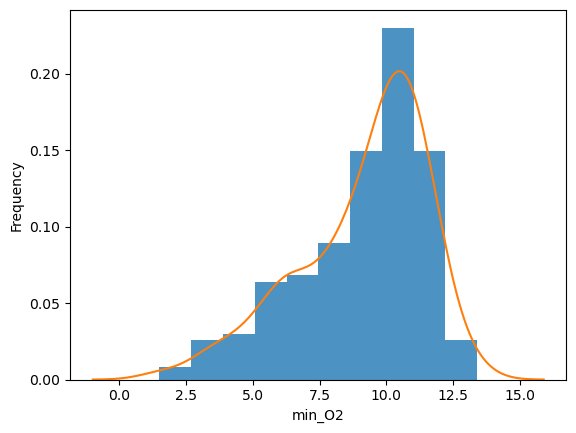

/home/PStefans/.conda/envs/pandas_workshop/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


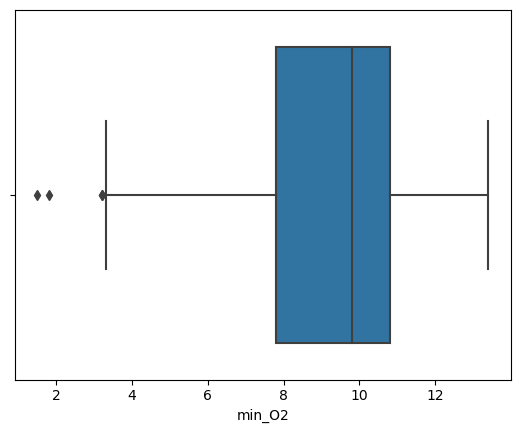

,Season,Size,Speed,max_pH,min_O2,mean_Cl,mean_NO3,mean_NH4,mean_oPO4,mean_PO4,mean_Chlor,a1,a2,a3,a4,a5,a6,a7


In [53]:
## min_O2
df['min_O2'].plot(kind='hist', legend=False, density=True, alpha=0.8)
sns.kdeplot(df.min_O2)
plt.show()

## kde (Kernel Density Estimation) estimates the pdf (probability density function) and from the plot below we can deduct the realtive likelihood of a random number being close to the sample
## the highest likelihood looks to be just abit over 10 

sns.boxplot(df.min_O2)
plt.show()

## From the boxplot we can see that the median vaue is a bit under 10 
## In this case it would be appropriate to replace any missing value with the mean as it has a better indication of being closer to the sample  

## replace min_O2 value with mean 
df.min_O2.fillna(df.min_O2.mean(), inplace=True)

## Check for if we missed any NA values 
df.loc[df.isna().sum(axis=1) > 0]



,a1,a2,a3,a4,a5,a6,a7
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,16.996465,7.470707,4.334343,1.997475,5.115657,6.004545,2.487374
std,21.421713,11.065461,6.976788,4.439205,7.511846,11.711053,5.181536
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.525000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.950000,3.000000,1.550000,0.000000,2.000000,0.000000,1.000000
75%,24.800000,11.275000,4.975000,2.400000,7.500000,6.975000,2.400000
max,89.800000,72.600000,42.800000,44.600000,44.400000,77.600000,31.600000


a1    3365.3
a2    1479.2
a3     858.2
a4     395.5
a5    1012.9
a6    1188.9
a7     492.5
dtype: float64

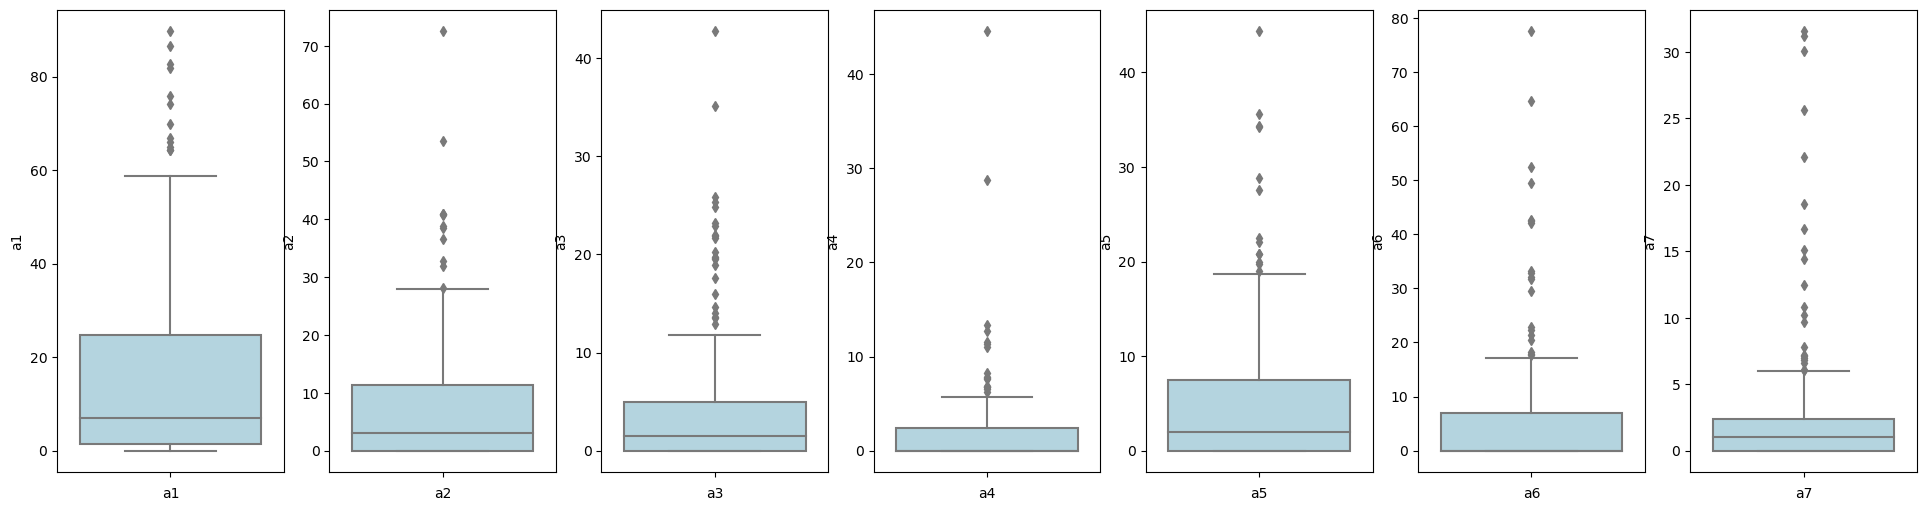

In [62]:
algae = ['a1','a2','a3','a4','a5','a6','a7']

fig, axs = plt.subplots(1, 7, figsize=(24,6))
for k, c in enumerate(algae):
    sns.boxplot(data=df, y=c, color="lightblue", ax=axs[k])
    axs[k].set_xlabel(c)

plt.show

display(df[algae].describe())
display(df[algae].sum(axis=0))








## From the table and plots below we can see that a1 has the highest standard deviation which means that there is more variablility and spread in the data
## A1 also has the highest frequency  as we can see from the total count table  of each algae , we will use a1 as a target as its has the highest frequency and is more spread out 


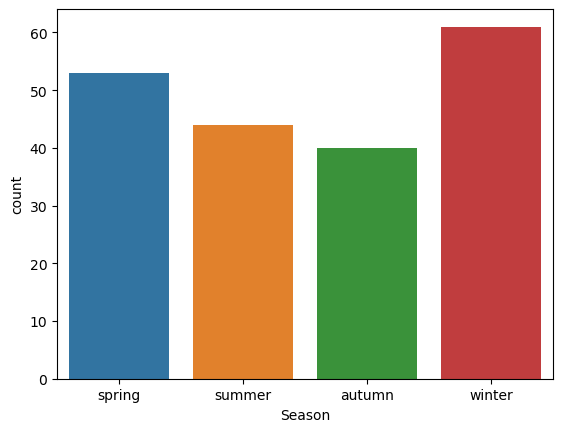

/home/PStefans/.conda/envs/pandas_workshop/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,min,max,mean,count,std
Season,,,,,
spring,0.0,89.8,16.649057,53,23.093786
summer,0.0,64.2,16.038636,44,17.920798
autumn,0.0,86.6,17.745000,40,21.611203
winter,0.0,81.9,17.498361,61,22.568256


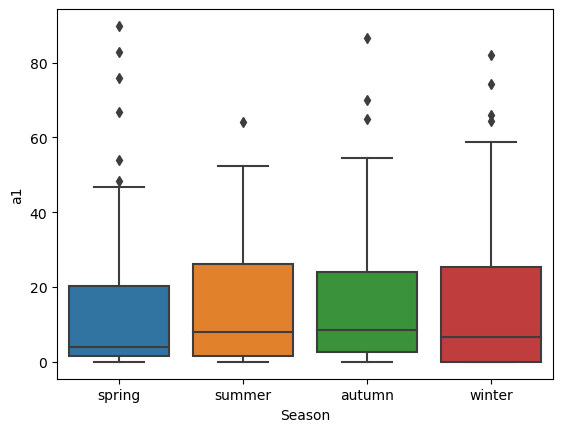

In [55]:
## Check for certain features that might be related to the target

## Checking season 

df.groupby("Season")["a1"].agg(["min","max","mean","count","std"])

sns.countplot(x=df['Season'])
plt.show()

sns.boxplot(df.Season , df.a1)
plt.show

df.groupby("Season")["a1"].agg(["min","max","mean","count","std"])


## From the countplot and boxplot we can see that there is no clear indication of the season affecting the algae count and all 4 seasons have similar mean and median values for the count
## There is nothing idicative of a relationship between the frequency and the season so we wont look into this anymore 

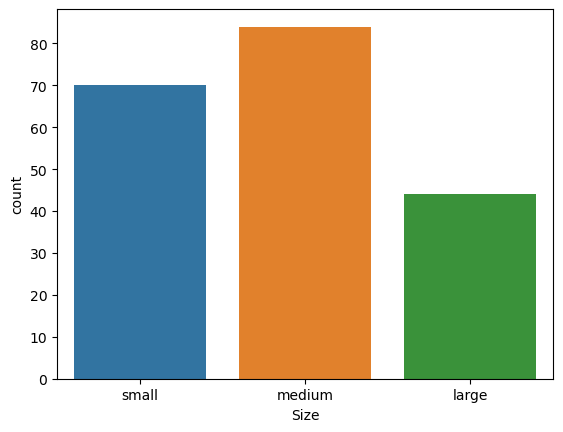

/home/PStefans/.conda/envs/pandas_workshop/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,min,max,mean,count,std
Size,,,,,
small,0.0,89.8,27.255714,70,24.895426
medium,0.0,86.6,11.267857,84,17.163124
large,0.0,56.8,11.611364,44,16.556123


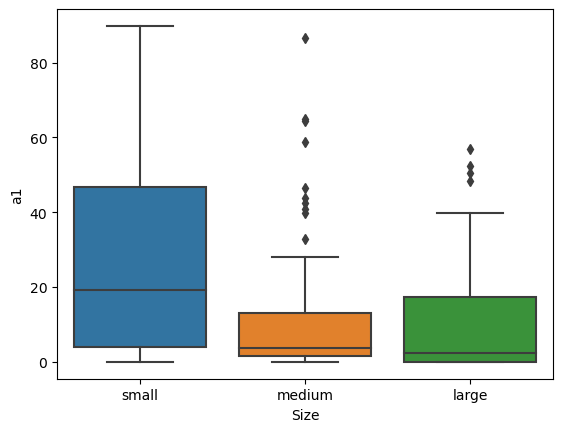

In [9]:
## Check size 

df.groupby("Size")["a1"].agg(["min","max","mean","count","std"])

sns.countplot(x=df['Size'])
plt.show()

sns.boxplot(df.Size , df.a1)
plt.show

df.groupby("Size")["a1"].agg(["min","max","mean","count","std"])


## The countplot doesnt tell us much here however looking at the boxplot we can  clearly that smaller algae have have a higher frequency than the others 
## As there is a possible relation between frequency and size of algea we should look into this further


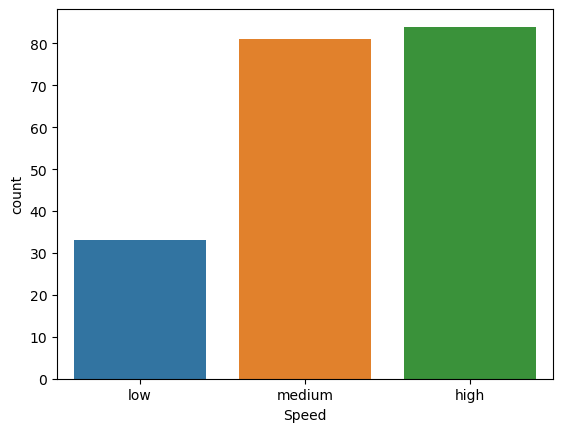

/home/PStefans/.conda/envs/pandas_workshop/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,min,max,mean,count,std
Speed,,,,,
low,0.0,58.7,9.209091,33,13.164758
medium,0.0,89.8,12.548148,81,21.146986
high,0.0,81.9,24.345238,84,22.209123


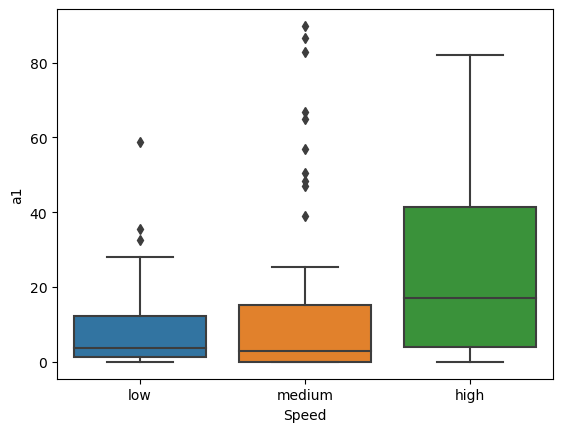

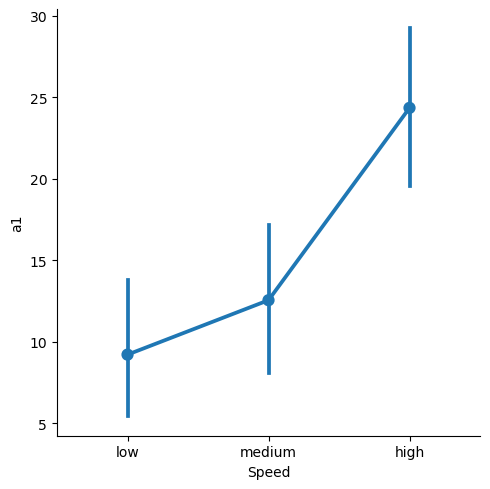

In [10]:
## Check speed 

df.groupby("Speed")["a1"].agg(["min","max","mean","count","std"])

sns.countplot(x=df['Speed'])
plt.show()

sns.boxplot(df.Speed , df.a1)
plt.show

sns.catplot(data=df , x="Speed" , y="a1" , kind="point")
plt.show

df.groupby("Speed")["a1"].agg(["min","max","mean","count","std"])


## From the  boxplot we can see that there is the frequency is much more widespread  and from the catplot we can see that the mean increases exponentially with the speed
## We can deduce that there is a relationship between the speed and frequency of algea and therfore should be investigated further


,max_pH,min_O2,mean_Cl,mean_NO3,mean_NH4,mean_oPO4,mean_PO4,mean_Chlor,a1
max_pH,1.000000,-0.148528,0.152562,-0.145182,0.026160,0.290245,0.213668,0.367930,-0.247787
min_O2,-0.148528,1.000000,-0.387237,0.059282,-0.343361,-0.452759,-0.511890,-0.203812,0.278605
mean_Cl,0.152562,-0.387237,1.000000,0.524604,0.562692,0.633095,0.678445,0.551625,-0.524848
mean_NO3,-0.145182,0.059282,0.524604,1.000000,0.425010,0.432303,0.447496,0.341653,-0.382403
mean_NH4,0.026160,-0.343361,0.562692,0.425010,1.000000,0.603157,0.644626,0.384227,-0.449194
mean_oPO4,0.290245,-0.452759,0.633095,0.432303,0.603157,1.000000,0.910464,0.483516,-0.671019
mean_PO4,0.213668,-0.511890,0.678445,0.447496,0.644626,0.910464,1.000000,0.523274,-0.655494
mean_Chlor,0.367930,-0.203812,0.551625,0.341653,0.384227,0.483516,0.523274,1.000000,-0.520324
a1,-0.247787,0.278605,-0.524848,-0.382403,-0.449194,-0.671019,-0.655494,-0.520324,1.000000


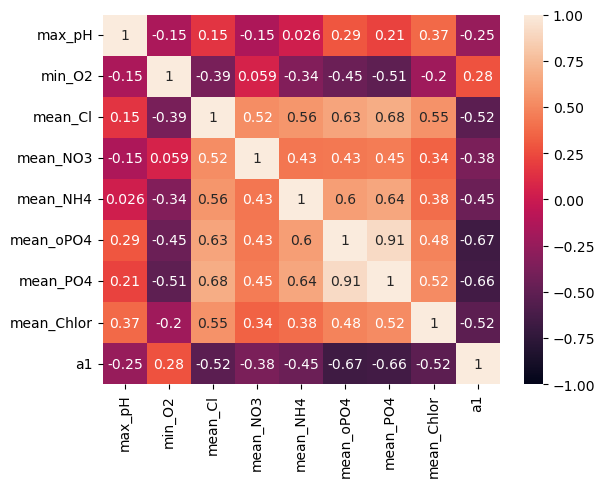

In [12]:
## Using Spearman’s Rank Coefficient to Identify addiontal feature relationships with target a1columns = df.columns[:12]
columns = df.columns[:12]
SpearCorr = df[columns].corr(method='spearman')

ax = sns.heatmap(SpearCorr, annot=True, vmin=-1 , vmax=1)

SpearCorr


## From the Spearman’s heatmap we can see a strong coreleation of a1 with mean_PO4 , mean_oPO4 and mean_Cl

interval columns not set, guessing: ['max_pH', 'min_O2', 'mean_Cl', 'mean_NO3', 'mean_NH4', 'mean_oPO4', 'mean_PO4', 'mean_Chlor', 'a1']


,Season,Size,Speed,max_pH,min_O2,mean_Cl,mean_NO3,mean_NH4,mean_oPO4,mean_PO4,mean_Chlor,a1
Season,1.000000,0.000000,0.000000,0.000000,0.347767,0.000000,0.000000,0.034202,0.000000,0.113527,0.016717,0.000000
Size,0.000000,1.000000,0.620101,0.655207,0.271610,0.295083,0.182410,0.000000,0.000000,0.521392,0.219744,0.353390
Speed,0.000000,0.620101,1.000000,0.445096,0.438738,0.329001,0.000000,0.101348,0.483298,0.591471,0.488537,0.369374
max_pH,0.000000,0.655207,0.445096,1.000000,0.129955,0.000000,0.000000,0.000000,0.000000,0.128623,0.441149,0.372031
min_O2,0.347767,0.271610,0.438738,0.129955,1.000000,0.357181,0.000000,0.416979,0.492317,0.536612,0.337781,0.000000
mean_Cl,0.000000,0.295083,0.329001,0.000000,0.357181,1.000000,0.247831,0.096017,0.450261,0.479983,0.244433,0.000000
mean_NO3,0.000000,0.182410,0.000000,0.000000,0.000000,0.247831,1.000000,0.642789,0.158463,0.260486,0.376033,0.000000
mean_NH4,0.034202,0.000000,0.101348,0.000000,0.416979,0.096017,0.642789,1.000000,0.734681,0.776305,0.201509,0.000000
mean_oPO4,0.000000,0.000000,0.483298,0.000000,0.492317,0.450261,0.158463,0.734681,1.000000,0.954537,0.000000,0.000000
mean_PO4,0.113527,0.521392,0.591471,0.128623,0.536612,0.479983,0.260486,0.776305,0.954537,1.000000,0.241126,0.212924


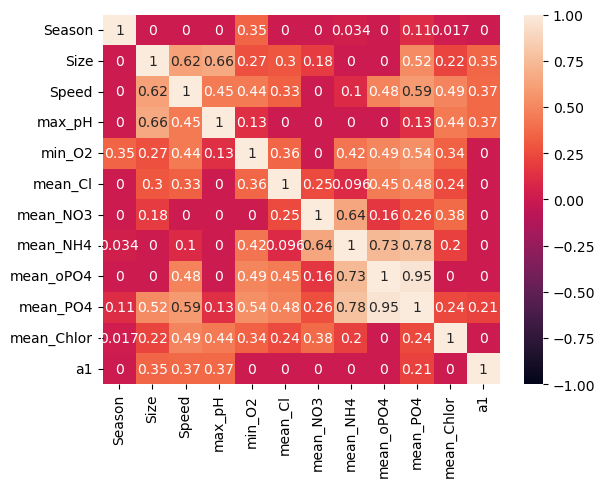

In [13]:
## Using Phiks Correlation Coefficient to Identify addiontal feature relationships with target a1 (includes categorical valeus)

import phik
columns = df.columns[:12]
PhikCorr = df[columns].phik_matrix()

ax = sns.heatmap(PhikCorr, annot=True, vmin=-1 , vmax=1)


PhikCorr

## From  Phicks corelation heatmap we can see a coreleation of a1 with Size , Speed and max_pH

,max_pH,min_O2,mean_Cl,mean_NO3,mean_NH4,mean_oPO4,mean_PO4,mean_Chlor,a1
max_pH,1.000000,-0.167980,0.133115,-0.130762,-0.093521,0.158769,0.180692,0.391434,-0.268539
min_O2,-0.167980,1.000000,-0.277485,0.099335,-0.087464,-0.415516,-0.486317,-0.165868,0.280021
mean_Cl,0.133115,-0.277485,1.000000,0.225041,0.074075,0.392307,0.456521,0.150828,-0.360781
mean_NO3,-0.130762,0.099335,0.225041,1.000000,0.721444,0.144588,0.169314,0.142910,-0.241211
mean_NH4,-0.093521,-0.087464,0.074075,0.721444,1.000000,0.227237,0.208444,0.093751,-0.132656
mean_oPO4,0.158769,-0.415516,0.392307,0.144588,0.227237,1.000000,0.913878,0.129416,-0.417358
mean_PO4,0.180692,-0.486317,0.456521,0.169314,0.208444,0.913878,1.000000,0.267589,-0.487301
mean_Chlor,0.391434,-0.165868,0.150828,0.142910,0.093751,0.129416,0.267589,1.000000,-0.283800
a1,-0.268539,0.280021,-0.360781,-0.241211,-0.132656,-0.417358,-0.487301,-0.283800,1.000000


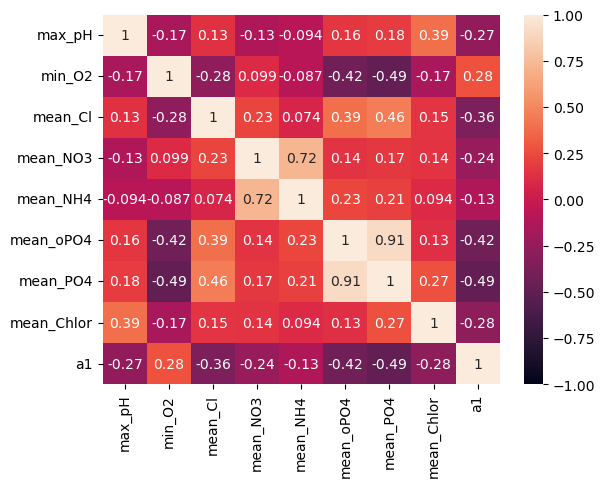

In [14]:
## Using Pearson’s Correlation Coefficient to Identify addiontal feature relationships with target a1

columns = df.columns[:12]
PearsonCorr = df[columns].corr()

ax = sns.heatmap(PearsonCorr, annot=True, vmin=-1 , vmax=1)
PearsonCorr

## From  Phicks corelation heatmap we can see yeat again a coreleation of a1 with mean_Cl, mean_oPO4 and mean_PO4

In [ ]:
## Finalised list from 3 different corealation coefficients : 
## Numerical : mean_PO4 , mean_oPO4 and mean_Cl, and max_pH
## Categorical : Size and Speed